#  Selected molecular descriptors from the Dragon chemoinformatics application were used to predict bioconcentration factors for 779 chemicals in order to evaluate QSAR (Quantitative Structure Activity Relationship). This dataset was obtained from the UCI machine learning repository. The dataset consists of 779 observations of 10 attributes. 
# Below is a brief description of each feature and the response variable logBCF in our dataset
# 1.nHM- number of heavy atoms (integer) 
# 2.piPC09- molecular multiple path count (numeric) 
# 3.PCD- difference between multiple path count and path count (numeric) 
# 4.X2Av- average valence connectivity (numeric) 
# 5.MLOGP- Moriguchi octanol-water partition coefficient (numeric) 
# 6.ON1V- overall modified Zagreb index by valence vertex degrees (numeric) 
# 7.N.072- Frequency of RCO-N< / >N-X=X fragments (integer) 
# 8.B02[C-N]- Presence/Absence of C-N atom pairs (binary) 
# 9.F04[C-O]- Frequency of C-O atom pairs (integer) 
# 10.logBCF- Bioconcentration Factor in log units (numeric) 



***Note : Write inference whenever it is required.***

1. Import required Library 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from fcmeans import FCM
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from warnings import filterwarnings
filterwarnings('ignore')

2. Read the dataset (tab, csv, xls, txt, inbuilt dataset) and display no of rows and columns in dataset.

In [8]:
with open('data_project.csv', 'r', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)
df.shape

(779, 14)

3. Display top five rows. 

In [9]:
df.head()

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.0,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.0,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.0,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.0,0.52,0.25,2.65,1.31,0,0,0,1,2.24


4.(a) Drop unnecessary columns(ÿCAS,SMILES,Set,Class). 
4.(b) Drop the Target variable

In [10]:
df.drop(columns=['CAS','SMILES','Set','Class'], inplace=True)

In [11]:
df.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF
0,0,0.0,1.49,0.14,1.35,0.72,0,1,5,0.74
1,0,0.0,1.47,0.14,1.70,0.88,0,1,5,0.93
2,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3.24
3,0,0.0,1.69,0.13,1.89,0.79,0,1,8,-0.40
4,0,0.0,0.52,0.25,2.65,1.31,0,0,0,2.24


In [12]:
df_1 = df.drop(columns=['logBCF'])
df_target = df['logBCF']

5.(a) Describe the dataset. 

In [13]:
df_1.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,3.585366
std,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,4.430421
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,0.000000
50%,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,2.000000
75%,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,6.000000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000


5.(b)  Do proper EDA over dataset (5 Marks)

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nHM       779 non-null    int64  
 1   piPC09    779 non-null    float64
 2   PCD       779 non-null    float64
 3   X2Av      779 non-null    float64
 4   MLOGP     779 non-null    float64
 5   ON1V      779 non-null    float64
 6   N-072     779 non-null    int64  
 7   B02[C-N]  779 non-null    int64  
 8   F04[C-O]  779 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.9 KB


In [15]:
df_1.isnull().sum()

nHM         0
piPC09      0
PCD         0
X2Av        0
MLOGP       0
ON1V        0
N-072       0
B02[C-N]    0
F04[C-O]    0
dtype: int64

6. Apply scaling techinque  and transform the data. 

In [16]:
sc=StandardScaler()
df_sc=sc.fit_transform(df_1)
df_sc=pd.DataFrame(df_sc,columns=df_1.columns)
df_sc

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
0,-0.884220,-1.162903,-0.063482,-0.649235,-1.161204,-0.947350,-0.371073,1.166450,0.319505
1,-0.884220,-1.162903,-0.084357,-0.649235,-0.941724,-0.755553,-0.371073,1.166450,0.319505
2,-0.884220,-1.162903,-0.366167,0.087918,0.588366,0.658947,-0.371073,-0.857302,-0.809781
3,-0.884220,-1.162903,0.145266,-0.716249,-0.822578,-0.863439,-0.371073,1.166450,0.997077
4,-0.884220,-1.162903,-1.075911,0.087918,-0.345992,-0.240100,-0.371073,-0.857302,-0.809781
...,...,...,...,...,...,...,...,...,...
774,0.123545,-1.162903,-0.073919,-0.448193,-0.396159,-0.935363,-0.371073,1.166450,0.093648
775,-0.380337,1.038406,0.855010,-0.515207,0.356344,0.922668,-0.371073,1.166450,-0.132209
776,-0.884220,-1.162903,0.166141,-0.716249,-0.822578,-0.863439,-0.371073,1.166450,0.997077
777,-0.884220,-1.162903,-0.376604,-0.180138,-0.245658,0.215417,-0.371073,-0.857302,-0.583924


7(a). Apply KMeans Clustering from k = 1 to 10 and display WSS values. (1 mark)
7(b). Display Elbow curve for above k values. (2 marks)
7(c). Apply KMeans Clustering for specific k value (2 marks)
7(d). Display predicted labels with x as piPC09 and y as PCD with hue as kmeans predicetd label. (1 mark)
7(e). Write proper inference

In [17]:
km=KMeans(random_state=30)

In [18]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df_sc)
    wcss.append(km.inertia_)
wcss

[7011.0,
 5502.816554742106,
 4582.518081613665,
 4052.6550753999913,
 3580.470629475012,
 3207.6162376637776,
 2865.852055886618,
 2702.3226998903638,
 2560.1430488156047]

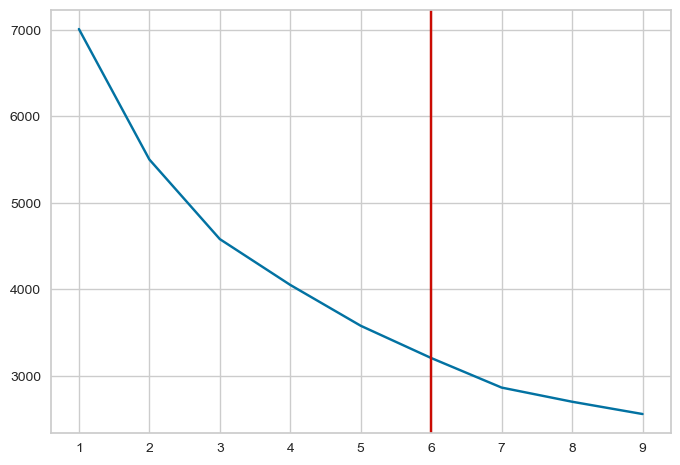

In [19]:
sns.lineplot(x=np.arange(1,10),y=wcss,markers='o')
plt.axvline(x=6,color='r')
plt.grid(True)
plt.show()

In [20]:
km2=KMeans(n_clusters=6,random_state=30)
km2.fit(df_sc)

KMeans(n_clusters=6, random_state=30)

In [21]:
df_kmean=df_sc.copy()
df_kmean['label']=km2.labels_

<Axes: xlabel='piPC09', ylabel='PCD'>

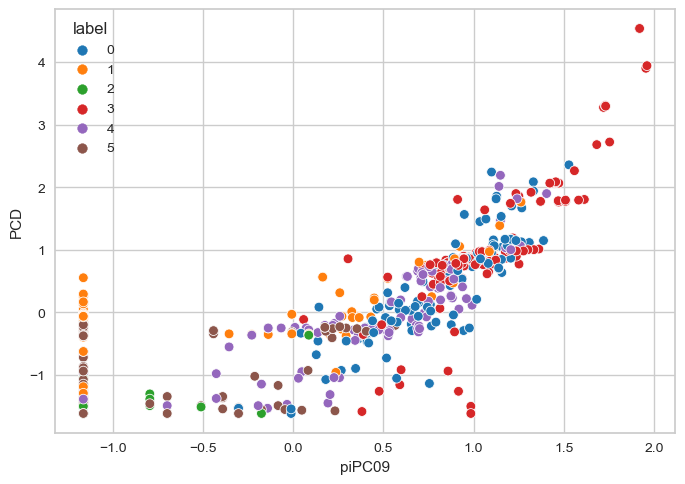

In [22]:
sns.scatterplot(data=df_kmean,x='piPC09',y='PCD',hue='label',palette='tab10')

## Inference:
1) The elbow plot suggests that the optimal number of clusters is around 6. This is where the WCSS starts to decrease at a slower rate.
2) Applying Kmeans clustering with 6 clusters, the dataset was divided into distinct groups based on the molecular descriptors.
3) The scatter plot of 'PiPC09' vs 'PCD' with hues representing the KMeans predicted labels shows the separation of data points into different clusters.

8(a). Apply Agglomerative Clustering with different no. of cluster
8(b). Choose appropriate evaluation metric to find best no. of clusters
8(c). Display predicted labels with x as piPC09 and y as PCD with hue as agglometrative predicetd label.
8(d). Write proper inference

In [25]:
for i in range(2,11):
    agc=AgglomerativeClustering(n_clusters=i)
    agc.fit(df_sc)
    ss=silhouette_score(df_sc,agc.labels_)
    print(i,':',ss) 

2 : 0.20720393010666405
3 : 0.2417973614981374
4 : 0.2307321757509227
5 : 0.2045087238921572
6 : 0.22019620949166743
7 : 0.23291679574357632
8 : 0.23663500361045137
9 : 0.2455729991004712
10 : 0.2459323495143644


In [26]:
agc2=AgglomerativeClustering(n_clusters=3,linkage='ward')
agc2.fit(df_sc)

AgglomerativeClustering(n_clusters=3)

In [27]:
df_agc=df_sc.copy()
df_agc['label']=agc2.labels_

<Axes: xlabel='piPC09', ylabel='PCD'>

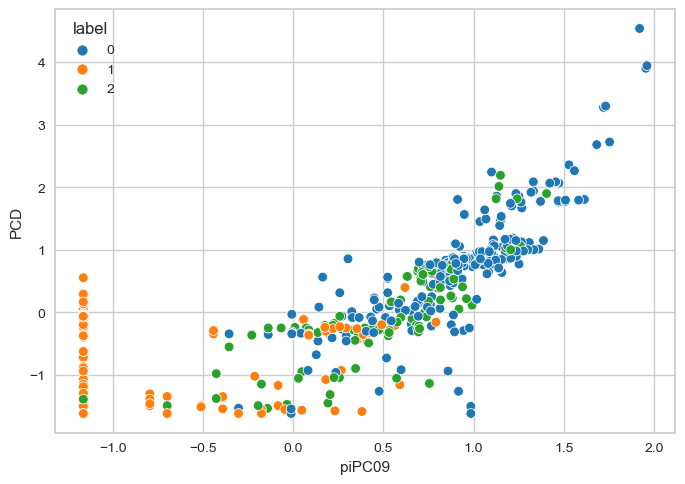

In [28]:
sns.scatterplot(data=df_agc,x='piPC09',y='PCD',hue='label',palette='tab10')

## Inference:
1. Silhouette score is used to find the optimal number of clusters. The Silhouette score measures how similar an object is to its clusters.
2. Agglomerative clustering with 3 clusters was selected based on silhouette scores.
3. The scatter plot of 'PiPC09' vs 'PCD' with hues representing the predicted labels illustrates the clustering achieved.
 

9(a). Apply DBSCAN Technique
9(b). Choose proper parameter for eps,min
9(c). Display predicted labels with x as piPC09 and y as PCD with hue as DBSCAN predicetd label.
9(d). Write proper inference

In [31]:
db=DBSCAN(eps=0.3,min_samples=10)
db.fit(df_sc)

DBSCAN(eps=0.3, min_samples=10)

In [32]:
df_db=df_sc.copy()
df_db['label']=db.labels_
df_db.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],label
0,-0.88422,-1.162903,-0.063482,-0.649235,-1.161204,-0.947350,-0.371073,1.166450,0.319505,-1
1,-0.88422,-1.162903,-0.084357,-0.649235,-0.941724,-0.755553,-0.371073,1.166450,0.319505,-1
2,-0.88422,-1.162903,-0.366167,0.087918,0.588366,0.658947,-0.371073,-0.857302,-0.809781,-1
3,-0.88422,-1.162903,0.145266,-0.716249,-0.822578,-0.863439,-0.371073,1.166450,0.997077,-1
4,-0.88422,-1.162903,-1.075911,0.087918,-0.345992,-0.240100,-0.371073,-0.857302,-0.809781,-1


<Axes: xlabel='piPC09', ylabel='PCD'>

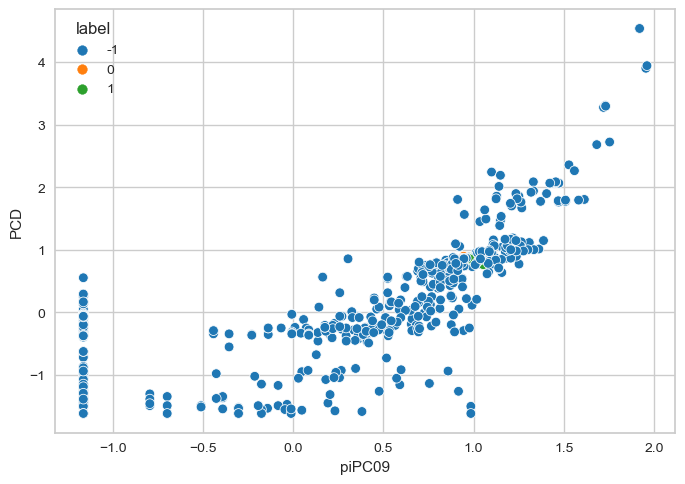

In [33]:
sns.scatterplot(data=df_db,x='piPC09',y='PCD',hue='label',palette='tab10')

In [34]:
nn=NearestNeighbors(n_neighbors=25).fit(df_sc)
nn.kneighbors(df_sc)

(array([[0.        , 0.        , 0.07120618, ..., 0.94351131, 0.94518681,
         0.98590231],
        [0.        , 0.01043741, 0.08305979, ..., 0.94185299, 0.94344429,
         0.95626816],
        [0.        , 0.54257169, 0.54257169, ..., 1.42989919, 1.43673192,
         1.4392698 ],
        ...,
        [0.        , 0.02087482, 0.20014525, ..., 0.99085024, 0.9969181 ,
         1.05863805],
        [0.        , 0.38101392, 0.54210685, ..., 1.00761595, 1.02878587,
         1.06302266],
        [0.        , 0.        , 0.32348927, ..., 0.98506215, 0.98622171,
         0.9907002 ]]),
 array([[  0, 456, 689, ..., 425, 761, 685],
        [  1, 457, 448, ..., 440, 692, 761],
        [  2,  28, 177, ...,  48,  29,  53],
        ...,
        [776,   3, 124, ..., 778, 692,  30],
        [777, 767, 177, ...,   2,  61,   5],
        [778, 773, 772, ...,   6,   3, 612]], dtype=int64))

In [35]:
dist,indices=nn.kneighbors(df_sc)
dist[0]

array([0.        , 0.        , 0.07120618, 0.2623788 , 0.29166152,
       0.29222126, 0.33203828, 0.33203828, 0.41282306, 0.46026384,
       0.56062049, 0.66176735, 0.66176735, 0.66653079, 0.68899657,
       0.72610894, 0.75455465, 0.79301888, 0.79876772, 0.91466572,
       0.92328093, 0.93520583, 0.94351131, 0.94518681, 0.98590231])

In [36]:
indices[0]

array([  0, 456, 689, 762, 457,   1, 100, 448, 772,  30, 244, 773, 778,
       687, 694, 124, 291,   3, 776, 612, 688, 121, 425, 761, 685],
      dtype=int64)

In [37]:
distance=np.sort(dist, axis=0)
distance[0]

array([0.        , 0.        , 0.        , 0.01043741, 0.01240835,
       0.03195397, 0.03587507, 0.04279858, 0.05218706, 0.0733691 ,
       0.0741798 , 0.08223316, 0.08970001, 0.33529998, 0.38292988,
       0.52628079, 0.52663182, 0.52673524, 0.52673524, 0.52673524,
       0.52771155, 0.52819627, 0.52925925, 0.52989089, 0.53142059])

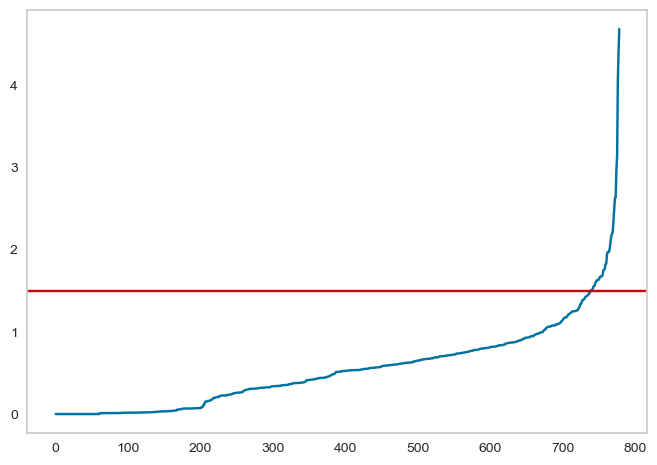

In [38]:
plt.plot(distance[:,1])
plt.axhline(y=1.5, color='r')
plt.grid()
plt.show()

In [39]:
db2=DBSCAN(eps=1.5,min_samples=15)
db2.fit(df_sc)

DBSCAN(eps=1.5, min_samples=15)

In [40]:
df_db2=df_sc.copy()
df_db2['label']=db2.labels_

<Axes: xlabel='piPC09', ylabel='PCD'>

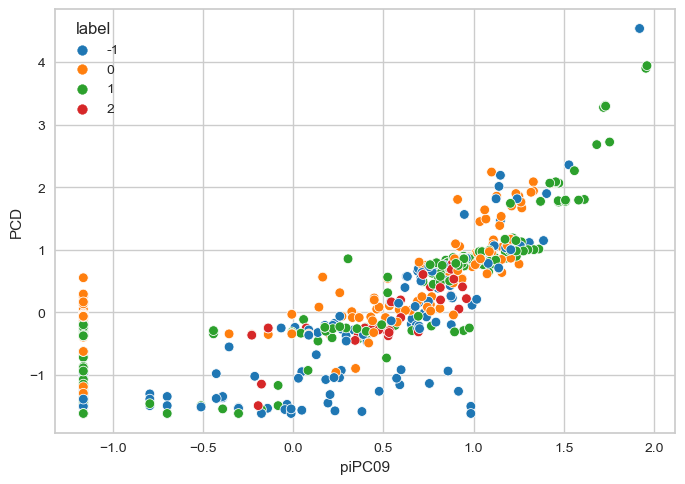

In [41]:
sns.scatterplot(data=df_db2,x='piPC09',y='PCD',hue='label',palette='tab10')

## Inference:
1. DBSCAN clustering was applied with specific parameters(epsilon = 1.5,min_samples = 15).
2. This technique identified outliers as points labeled as -1 and grouped similar points into clusters.
3. The scatter plot of 'piPC09' vs 'PCD' with hues representing the DBSCAN predicted labels illustrates the grouping of data points.

10(a). Apply GMM  Soft clustering and display the clustered labels. 
10(b). Also evaluate the cluster using proper metrics

In [42]:
gm=GaussianMixture(n_components=4,n_init=10,max_iter=100)
gm.fit(df_sc)
gm.predict(df_sc)

array([0, 0, 3, 0, 3, 3, 0, 3, 0, 2, 2, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3, 3, 3, 3, 0, 3, 1, 1, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 0, 1,
       3, 3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 3, 2, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       2, 0, 0, 3, 0, 3, 3, 0, 3, 0, 2, 2, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0,
       3, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       1, 3, 3, 0, 0, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 3,
       0, 3, 2, 1, 0, 3, 1, 3, 1, 0, 0, 3, 0, 3, 3, 3, 2, 2, 2, 0, 3, 0,
       3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 2, 3, 3, 2, 2,
       3, 0, 2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3,
       2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0, 3, 2, 3, 3, 3, 3,
       0, 3, 0, 0, 0, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 3, 2,
       0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 2, 0,

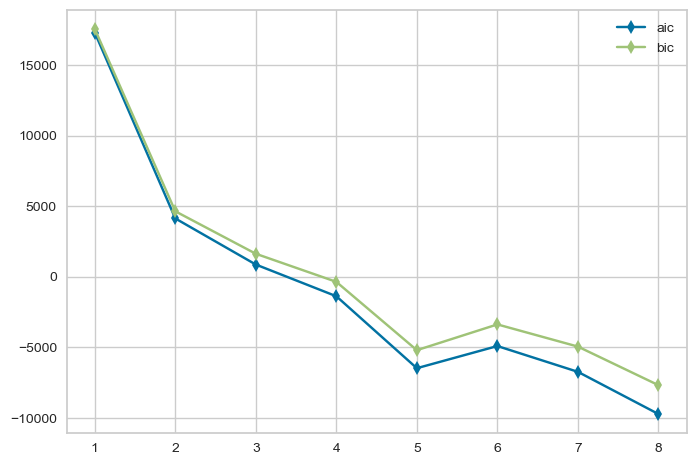

In [47]:
bic=[]
aic=[]
for i in range(8):
    gm=GaussianMixture(n_components=i+1,n_init=10,max_iter=100)
    gm.fit(df_sc)
    bic.append(gm.bic(df_sc))
    aic.append(gm.aic(df_sc))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic, marker = "d", label = 'aic')
plt.plot([1,2,3,4,5,6,7,8], bic, marker = "d", label = 'bic')
plt.legend()
plt.show()

<Axes: xlabel='piPC09', ylabel='PCD'>

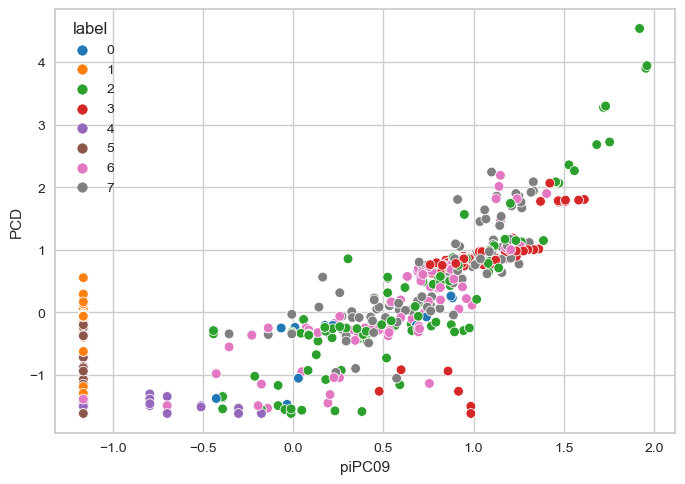

In [48]:
df_gm=df_sc.copy()
df_gm['label']=gm.predict(df_sc)
sns.scatterplot(data=df_gm,x='piPC09',y='PCD',hue='label',palette='tab10')

## Inference:
1. The GMM is initialized with 4 components.
2. The model is fitted to the dataset and the cluster labels are predicted for each data point.
3. Line plot is plotted between AIC and BIC. Lower the AIC and BIC values indicate better models.
4. Scatter plot shows the structure of the data and how well the model seperated it into different groups.  

11(a). Apply FCM  Soft clustering and display the clustered labels. 
11(b). Also evaluate the cluster using proper metrics

Elbow Method to determine the number of clusters to be formed:


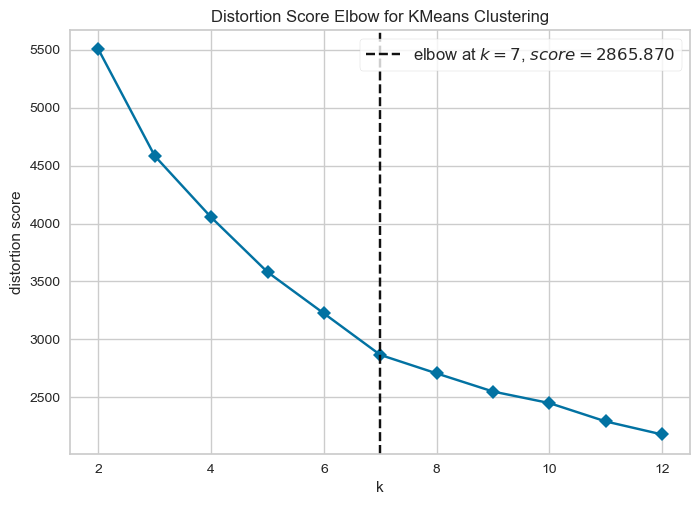

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=12, timings=False)
Elbow_M.fit(df_sc)
Elbow_M.show()

In [51]:
fcm=FCM(n_clusters=7)
fcm.fit(df_sc.values)

In [52]:
fcm_labels=fcm.predict(df_sc.values)

In [53]:
silhouette_score(df_sc,fcm_labels)

0.12308851079111793

In [54]:
davies_bouldin_score(df_sc,fcm_labels)

2.736821692266843

In [55]:
calinski_harabasz_score(df_sc,fcm_labels)

95.52652604250434

## Inference:
1. Silhouette score of 0.123 shows that the clusters are overlapping and not well separated.
2. Davies-Bouldin score of 2.737 indicates moderate separation between the clusters.
3. Calinski-Harabasz score of 95.527 shows better defined clusters. 

12(a). Apply PCA and display explained variance.
12(b). Display Cumulative variance. 
12(c). Apply proper technique to find optimal n_components for pca
12(d). Decompose the dataset with by retaining 95% of information using PCA

In [56]:
pca=PCA()
pca.fit(df_sc)

PCA()

In [57]:
pca.explained_variance_

array([2.57876759, 2.08934059, 1.31127992, 0.98886169, 0.67472501,
       0.56386608, 0.46804863, 0.22433407, 0.11234454])

In [58]:
pca.explained_variance_ratio_

array([0.28616192, 0.23185095, 0.14551074, 0.10973248, 0.07487321,
       0.06257136, 0.05193864, 0.02489401, 0.0124667 ])

In [59]:
cum_var=np.cumsum(pca.explained_variance_)
cum_var

array([2.57876759, 4.66810818, 5.97938811, 6.96824979, 7.6429748 ,
       8.20684088, 8.67488951, 8.89922358, 9.01156812])

In [60]:
cum_var_ratio=np.cumsum(pca.explained_variance_ratio_)
cum_var_ratio

array([0.28616192, 0.51801286, 0.6635236 , 0.77325607, 0.84812928,
       0.91070064, 0.96263929, 0.9875333 , 1.        ])

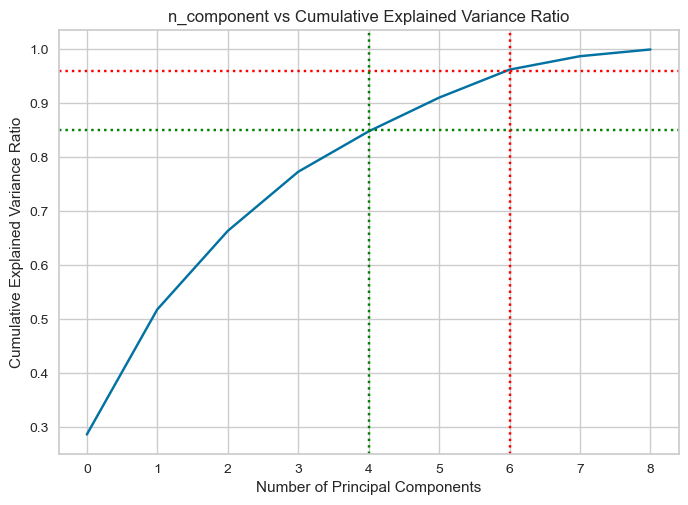

In [61]:
explained_variance=pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('n_component vs Cumulative Explained Variance Ratio')
plt.axhline(0.96, c='red',linestyle='dotted')
plt.axhline(0.85, c='green',linestyle='dotted')
plt.axvline(6, c='red',linestyle='dotted')
plt.axvline(4, c='green',linestyle='dotted')
plt.show()

In [62]:
pca2=PCA(n_components=0.95)
pca_df= pd.DataFrame(pca2.fit_transform(df_sc))
pca_df.head()

,0,1,2,3,4,5,6
0,1.016009,-1.487967,-1.442479,-0.457584,0.726557,0.405753,-0.122824
1,0.881730,-1.425552,-1.307014,-0.496336,0.648610,0.361328,-0.301334
2,0.768580,0.393879,0.200132,-1.114406,-1.063223,-0.693351,-0.695911
3,0.557953,-1.538621,-1.221316,-0.604389,1.128133,0.321561,-0.095357
4,1.766564,0.025886,-0.155269,-0.922593,-0.656319,-0.728863,-0.213843


## Inference:
1. The Explained variance for each principal component is obtained and shows the variance captured by each component.
2. The Cumulative variance ratio is plotted against the number of principal components to retain sufficient variance.
3. Based on the cumulative variance plot, it is observed that around 85% is retained with 4 components and around 96% with 6 components.

13(a) Cluster the decomposed pca data into optimal cluster with most suitable hard & soft clustering method
13(b) Write the inferenece for the above

In [64]:
# hard clustering
agg=AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(pca_df)

AgglomerativeClustering(n_clusters=3)

In [65]:
silhouette_score(pca_df,agg.labels_)

0.2380966839599472

In [66]:
#soft clustering
gmm=GaussianMixture(n_components=3,n_init=10,max_iter=100)
gmm.fit(pca_df)

GaussianMixture(n_components=3, n_init=10)

In [67]:
silhouette_score(pca_df,gmm.predict(pca_df))

0.1964502670305572

## Inference:
1. Using Hard Clustering(Agglomerative clustering) on the PCA transformed data with 6 components, a Silhouette score of 0.194 indicates a reasonable degree of separation between the clusters.
2. Using Soft Clustering(GMM) in the PCA transformed data with 6 components yields a silhouette score of 0.194, indicating overlapping of clusters with less separation.

14(a). Apply SVD and display explained variance.
14(b). Display Cumulative variance. 
14(c). Apply proper technique to find optimal n_components for svd
14(d). Decompose the dataset with by retaining 90% of information using PCA

In [68]:
svd=TruncatedSVD(n_components=9)
svd.fit(df_sc)

TruncatedSVD(n_components=9)

In [69]:
svd.explained_variance_

array([2.57545724, 2.08665851, 1.30959664, 0.98759229, 0.67385886,
       0.56314225, 0.4674478 , 0.22404609, 0.11220032])

In [70]:
svd.explained_variance_ratio_

array([0.28616192, 0.23185095, 0.14551074, 0.10973248, 0.07487321,
       0.06257136, 0.05193864, 0.02489401, 0.0124667 ])

In [71]:
cum_var=np.cumsum(svd.explained_variance_)
cum_var

array([2.57545724, 4.66211575, 5.97171238, 6.95930467, 7.63316353,
       8.19630578, 8.66375358, 8.88779968, 9.        ])

In [72]:
cum_var_ratio=np.cumsum(svd.explained_variance_ratio_)
cum_var_ratio

array([0.28616192, 0.51801286, 0.6635236 , 0.77325607, 0.84812928,
       0.91070064, 0.96263929, 0.9875333 , 1.        ])

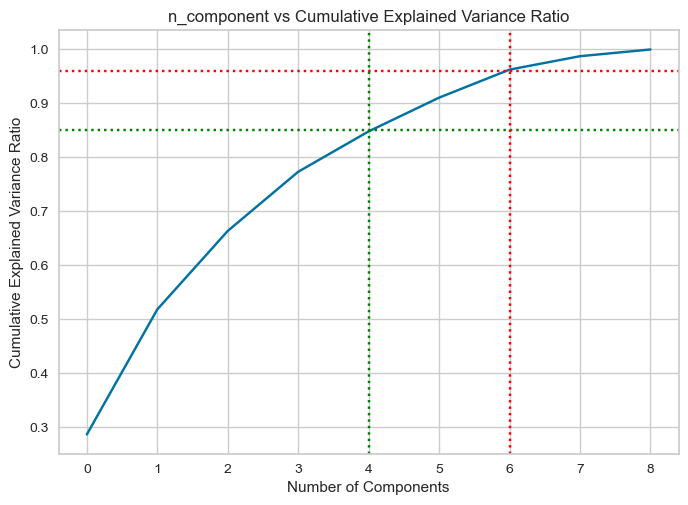

In [73]:
exp_variance=svd.explained_variance_ratio_
cum_variance = np.cumsum(exp_variance)
plt.plot(range(len(cum_variance)), cum_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('n_component vs Cumulative Explained Variance Ratio')
plt.axhline(0.96, c='red',linestyle='dotted')
plt.axhline(0.85, c='green',linestyle='dotted')
plt.axvline(6, c='red',linestyle='dotted')
plt.axvline(4, c='green',linestyle='dotted')
plt.show()

In [74]:
svd2=TruncatedSVD(n_components=6)
svd_df= pd.DataFrame(svd2.fit_transform(df_sc))
svd_df.head()

,0,1,2,3,4,5
0,1.016009,-1.487967,-1.442479,-0.457584,0.726557,0.405753
1,0.881730,-1.425552,-1.307014,-0.496336,0.648610,0.361328
2,0.768580,0.393879,0.200132,-1.114406,-1.063223,-0.693351
3,0.557953,-1.538621,-1.221316,-0.604389,1.128133,0.321561
4,1.766564,0.025886,-0.155269,-0.922593,-0.656319,-0.728863


## Inference:
1. The Cumulative variance ratio is plotted against the number of principal components to retain sufficient variance.
2. Based on the cumulative variance plot, it is observed that around 85% is retained with 4 components and around 96% with 6 components.

In [ ]:
15(a). Cluster the decomposed svd data into optimal cluster with most suitable hard & soft clustering method
15(b). Write the inferenece for the above

In [75]:
# Hard Clustering
agg2=AgglomerativeClustering(n_clusters=3,linkage='ward')
agg2.fit(svd_df)
silhouette_score(svd_df,agg2.labels_)

0.23085075540928865

In [76]:
#soft clustering
gmm2=GaussianMixture(n_components=3,n_init=10,max_iter=100)
gmm2.fit(svd_df)
silhouette_score(svd_df,gmm2.predict(svd_df))

0.19419195110412207

## Inference:
1. Using Soft Clustering(GMM) on the SVD transformed data with 3 components, a Silhouette score of 0.194 indicates overlapping of clusters with less separation.
2. Using Hard Clustering(Agglomerative) in the SVD transformed data with 3 clusters yields a silhouette score of 0.230, indicating a reasonable degree of separation between the clusters. 